In [11]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd

In [13]:
%pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import sys
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

def load_dataset(url=".Darknetsv"):
    df = pd.read_csv(url, encoding='latin1')
    return df

load_dataset()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158611,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158612,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158613,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158614,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [17]:
# Cell 3: Clean the Dataset
def clean_dataset(df):
    # 1. Handle missing values
    df = df.dropna(axis=0, how='any')  # Drop rows with any missing values

    # 2. Fix inconsistent formats (example: strip whitespace from column names)
    df.columns = df.columns.str.strip()

    # 3. Detect and handle outliers (example: clip numeric columns at 1st/99th percentiles)
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        lower, upper = df[col].quantile([0.01, 0.99])
        df[col] = df[col].clip(lower, upper)

    # 4. Encode categorical variables
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    # 5. Scale numeric features
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df



In [18]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
# Load the dataset
def load_dataset(path="Darknet.csv"):
    df = pd.read_csv(path, encoding='latin1')
    return df

df_raw = load_dataset()
df_raw.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [21]:
df_clean = clean_dataset(df_raw)
df_clean.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10800\2401027968.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10800\2401027968.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower, upper)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10800\2401027968.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,22848,13,0.977124,3573,-0.769005,-0.793968,25486,-0.543452,-0.154891,-0.149360,...,0.0,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0
1,22849,13,0.977176,3573,-0.769005,-0.793968,25486,-0.543448,-0.154891,-0.149360,...,0.0,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0
2,22850,13,0.977228,3573,-0.769005,-0.793968,25486,-0.543447,-0.154891,-0.149360,...,0.0,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0
3,30890,13,0.560057,6058,-0.769005,-0.793968,25486,-0.543449,-0.154891,-0.149360,...,0.0,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0
4,15898,13,-0.190342,1751,0.085412,-0.793968,25484,-0.259819,2.036217,1.267746,...,0.0,0.0,0.0,0.0,1.026778,-0.292716,0.957381,1.168895,0,0


In [22]:
# Generate descriptive statistics
def eda_describe(df):
    print("Shape of dataset:", df.shape)
    print("\nSummary statistics:")
    display(df.describe(include='all'))
    print("\nClass distribution (Label):")
    if 'Label' in df.columns:
        print(df['Label'].value_counts())
    elif 'Label.1' in df.columns:
        print(df['Label.1'].value_counts())

eda_describe(df_clean)

Shape of dataset: (158568, 85)

Summary statistics:


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
count,158568.000000,158568.000000,1.585680e+05,158568.000000,1.585680e+05,1.585680e+05,158568.000000,1.585680e+05,1.585680e+05,1.585680e+05,...,158568.0,158568.0,158568.0,158568.0,1.585680e+05,1.585680e+05,1.585680e+05,1.585680e+05,158568.000000,158568.000000
mean,35527.497200,310.342730,-1.290527e-16,2619.472397,-6.882811e-17,-6.882811e-17,18008.271625,5.735676e-17,-2.294270e-17,-5.735676e-18,...,0.0,0.0,0.0,0.0,-6.882811e-17,4.014973e-17,-4.588541e-17,8.029947e-17,0.601647,4.315682
std,22024.728692,751.708029,1.000003e+00,2326.322127,1.000003e+00,1.000003e+00,8544.945588,1.000003e+00,1.000003e+00,1.000003e+00,...,0.0,0.0,0.0,0.0,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.060404,2.676823
min,0.000000,0.000000,-1.989645e+00,0.000000,-7.866716e-01,-7.939680e-01,0.000000,-5.434582e-01,-1.548907e-01,-1.529118e-01,...,0.0,0.0,0.0,0.0,-1.011908e+00,-2.927156e-01,-1.026095e+00,-8.431561e-01,0.000000,0.000000
25%,17672.750000,13.000000,-2.823939e-01,465.000000,-7.854486e-01,-7.939680e-01,13109.750000,-5.433243e-01,-1.548907e-01,-1.529118e-01,...,0.0,0.0,0.0,0.0,-1.011908e+00,-2.927156e-01,-1.026095e+00,-8.431561e-01,0.000000,2.000000
50%,30938.000000,13.000000,2.690349e-01,2356.000000,-6.047082e-01,-7.939680e-01,18498.000000,-5.324838e-01,-1.511770e-01,-1.493601e-01,...,0.0,0.0,0.0,0.0,2.060064e-02,-2.927156e-01,9.437848e-01,-8.431561e-01,0.000000,3.000000
75%,54622.250000,123.250000,7.746716e-01,4163.000000,1.013213e+00,1.259497e+00,23364.000000,-2.349040e-01,-1.437495e-01,-1.422568e-01,...,0.0,0.0,0.0,0.0,1.052994e+00,-2.927156e-01,9.829817e-01,1.194768e+00,1.000000,7.000000
max,79112.000000,4017.000000,1.337639e+00,7552.000000,2.035234e+00,1.259497e+00,34819.000000,2.613598e+00,9.094779e+00,8.897778e+00,...,0.0,0.0,0.0,0.0,1.053209e+00,4.837449e+00,9.830966e-01,1.194980e+00,3.000000,10.000000



Class distribution (Label):
Label
0    110396
1     23861
3     22919
2      1392
Name: count, dtype: int64


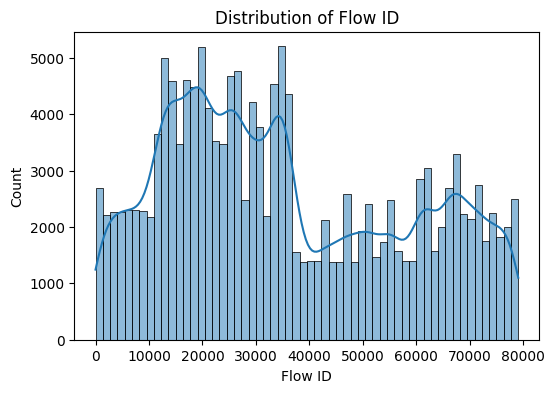

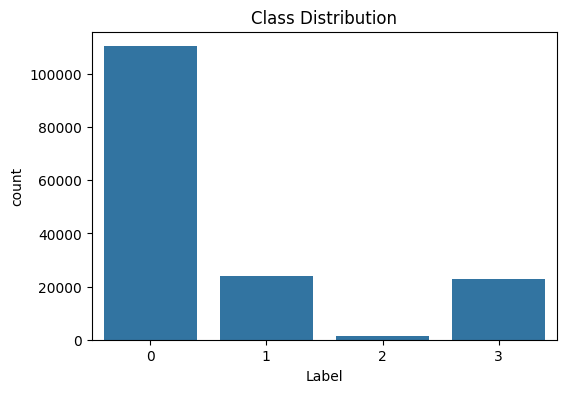

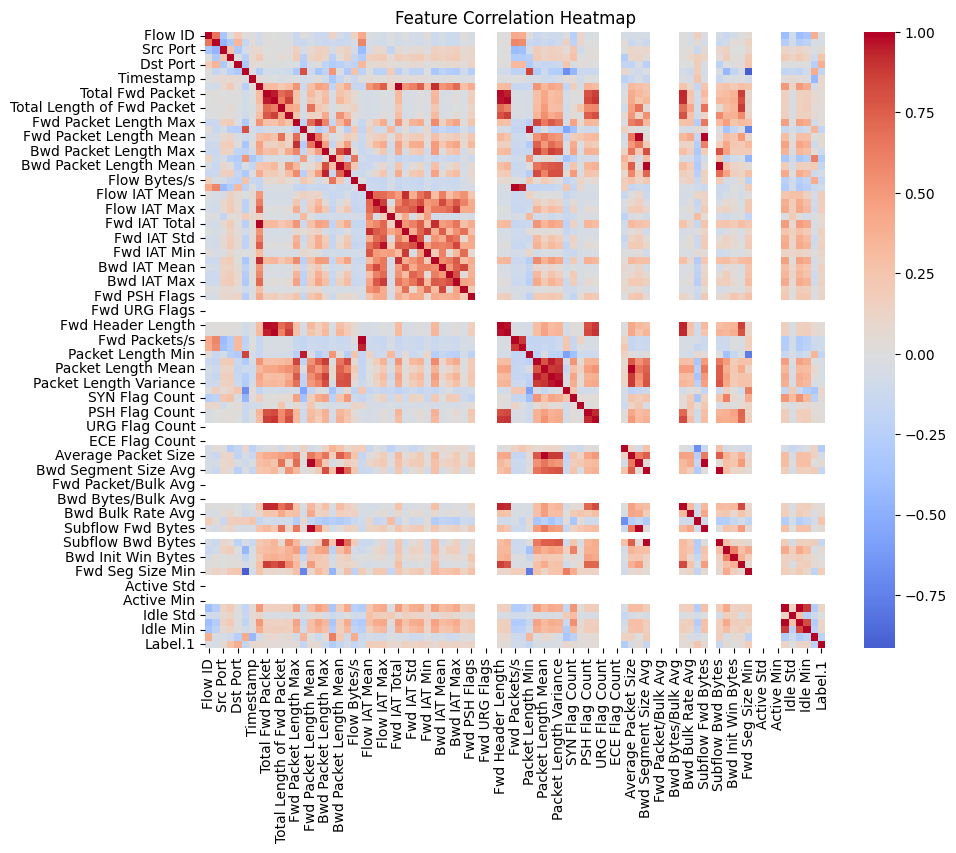

In [27]:
# Visualize distributions and relationships
def eda_visualize(df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Histogram for a numeric feature
    num_col = df.select_dtypes(include=['float64', 'int64']).columns[0]
    plt.figure(figsize=(6,4))
    sns.histplot(df[num_col], kde=True)
    plt.title(f'Distribution of {num_col}')
    plt.show()

    # Countplot for a categorical feature
    if 'Label' in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='Label', data=df)
        plt.title('Class Distribution')
        plt.show()
    elif 'Label.1' in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='Label.1', data=df)
        plt.title('Class Distribution')
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10,8))
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

eda_visualize(df_clean)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def run_kmeans(df, n_clusters=3):
    # Remove label columns for unsupervised clustering
    feature_cols = [col for col in df.columns if col not in ['Label', 'Label.1']]
    X = df[feature_cols]
    
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Add cluster labels to dataframe
    df['Cluster'] = clusters
    
    # Evaluate clustering
    score = silhouette_score(X, clusters)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.3f}")
    
    return df, kmeans

# Example: Try 3 clusters
df_clustered, kmeans_model = run_kmeans(df_clean, n_clusters=3)
df_clustered.head()

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5692\29307940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Silhouette Score for 3 clusters: 0.470


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1,Cluster
0,22848,13,0.977124,3573,-0.769005,-0.793968,25486,-0.543452,-0.154891,-0.149360,...,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0,2
1,22849,13,0.977176,3573,-0.769005,-0.793968,25486,-0.543448,-0.154891,-0.149360,...,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0,2
2,22850,13,0.977228,3573,-0.769005,-0.793968,25486,-0.543447,-0.154891,-0.149360,...,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0,2
3,30890,13,0.560057,6058,-0.769005,-0.793968,25486,-0.543449,-0.154891,-0.149360,...,0.0,0.0,0.0,-1.011908,-0.292716,-1.026095,-0.843156,0,0,0
4,15898,13,-0.190342,1751,0.085412,-0.793968,25484,-0.259819,2.036217,1.267746,...,0.0,0.0,0.0,1.026778,-0.292716,0.957381,1.168895,0,0,2


In [23]:
# Evaluate clustering with silhouette score (already printed in step 3)
print("Silhouette Score:", silhouette_score(df_clustered.drop(['Label', 'Label.1', 'Cluster'], axis=1), df_clustered['Cluster']))

# Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

def plot_clusters(df, cluster_col='Cluster'):
    feature_cols = [col for col in df.columns if col not in ['Label', 'Label.1', cluster_col]]
    X = df[feature_cols]
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=components[:,0], y=components[:,1], hue=df[cluster_col], palette='Set2', s=30)
    plt.title('KMeans Clusters (PCA Projection)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.show()


Silhouette Score: 0.4701370602908892


In [24]:

def run_kmeans(df, n_clusters=3):
    """Runs KMeans clustering and prints silhouette score."""
    feature_cols = [col for col in df.columns if col not in ['Label', 'Label.1']]
    X = df[feature_cols]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    df.loc[:, 'Cluster'] = clusters
    score = silhouette_score(X, clusters)
    print(f"Silhouette Score for {n_clusters} clusters: {score:.3f}")
    return df, kmeans

In [25]:
# 6. Cluster Visualization
def plot_clusters(df, cluster_col='Cluster'):
    """Visualizes clusters using PCA projection."""
    feature_cols = [col for col in df.columns if col not in ['Label', 'Label.1', cluster_col]]
    X = df[feature_cols]
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=components[:,0], y=components[:,1], hue=df[cluster_col], palette='Set2', s=30)
    plt.title('KMeans Clusters (PCA Projection)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.show()


In [6]:
def ensemble_clustering(df, n_clusters=3, sample_size=5000):
    """Compares KMeans and Agglomerative Clustering on a sample of the dataset."""
    feature_cols = [col for col in df.columns if col not in ['Label', 'Label.1', 'Cluster', 'KMeans_Cluster', 'Agglo_Cluster']]
    X = df[feature_cols]
    
    # KMeans on full data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_score = silhouette_score(X, kmeans_labels)
    print(f"KMeans Silhouette Score: {kmeans_score:.3f}")
    df['KMeans_Cluster'] = kmeans_labels

    # Agglomerative on a sample
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
        X_sample = df_sample[feature_cols]
    else:
        df_sample = df
        X_sample = X

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X_sample)
    agglo_score = silhouette_score(X_sample, agglo_labels)
    print(f"Agglomerative Silhouette Score (sample): {agglo_score:.3f}")
    df_sample['Agglo_Cluster'] = agglo_labels

    # Merge Agglo cluster labels back to main df (NaN for non-sampled rows)
    df['Agglo_Cluster'] = None
    df.loc[df_sample.index, 'Agglo_Cluster'] = agglo_labels

    return df

In [24]:
# Save the ensemble clustered dataset to a new CSV file
df_clean.to_csv("Darknet_cleaned.csv", index=False)
print("Ensemble clustered dataset saved as Darknet_cleaned.csv")

Ensemble clustered dataset saved as Darknet_cleaned.csv


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns